# Loan Default

### Import the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/teresazhang/Documents/NTU/Y3S1/BC3409/Assignment/Loan Default 2.csv")

In [3]:
df = df.drop(columns=["Index"])

### Check for null values

In [4]:
df.isnull().any()

Employed         False
Bank Balance     False
Annual Salary    False
Defaulted?       False
dtype: bool

In [5]:
df.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


### Data Visualisation

<AxesSubplot:>

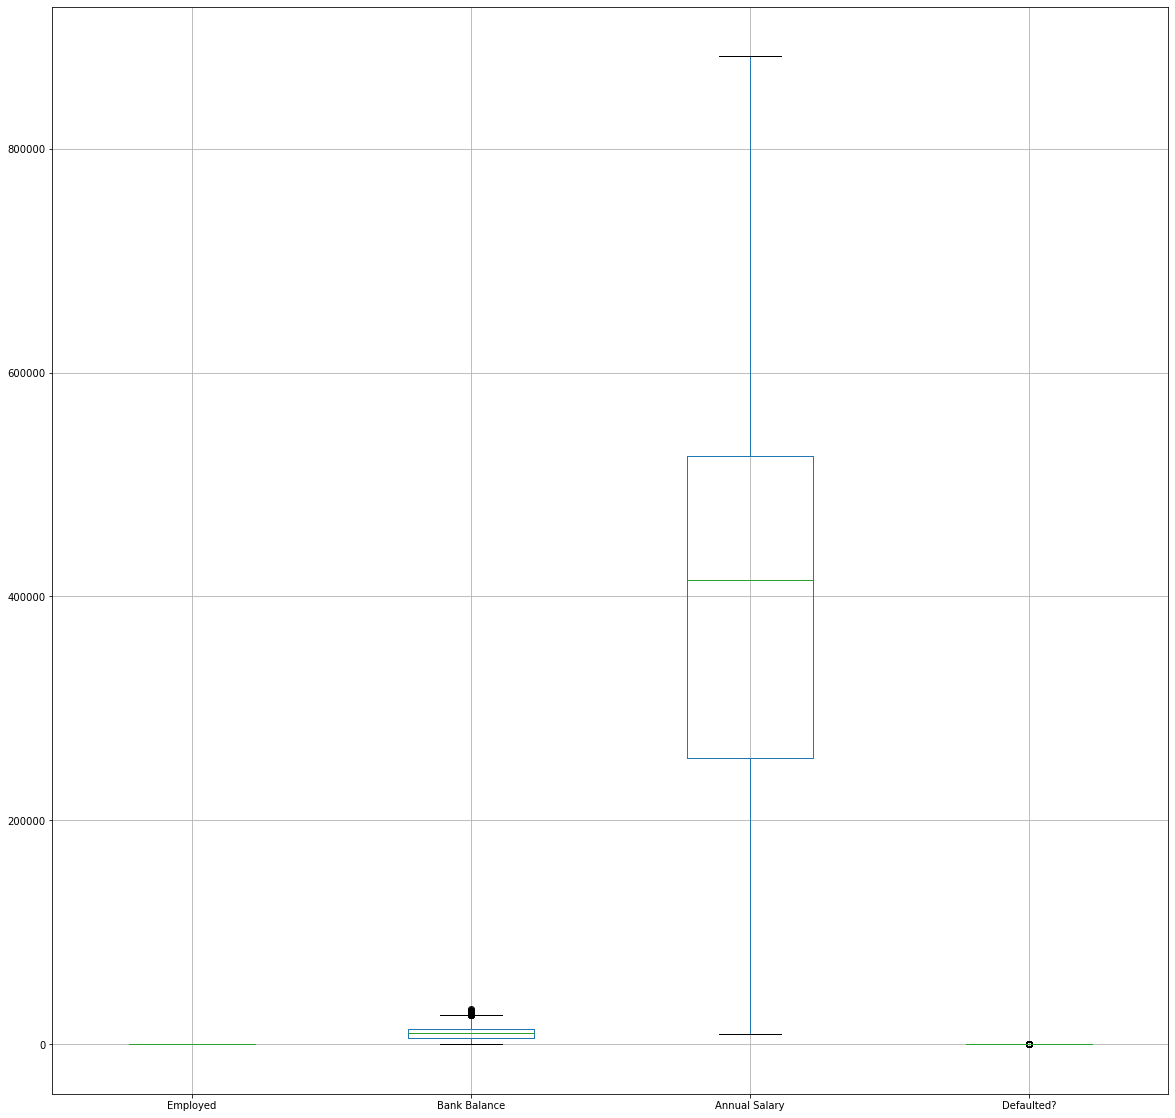

In [6]:
df.boxplot(figsize=(20,20))

array([[<AxesSubplot:title={'center':'Employed'}>,
        <AxesSubplot:title={'center':'Bank Balance'}>],
       [<AxesSubplot:title={'center':'Annual Salary'}>,
        <AxesSubplot:title={'center':'Defaulted?'}>]], dtype=object)

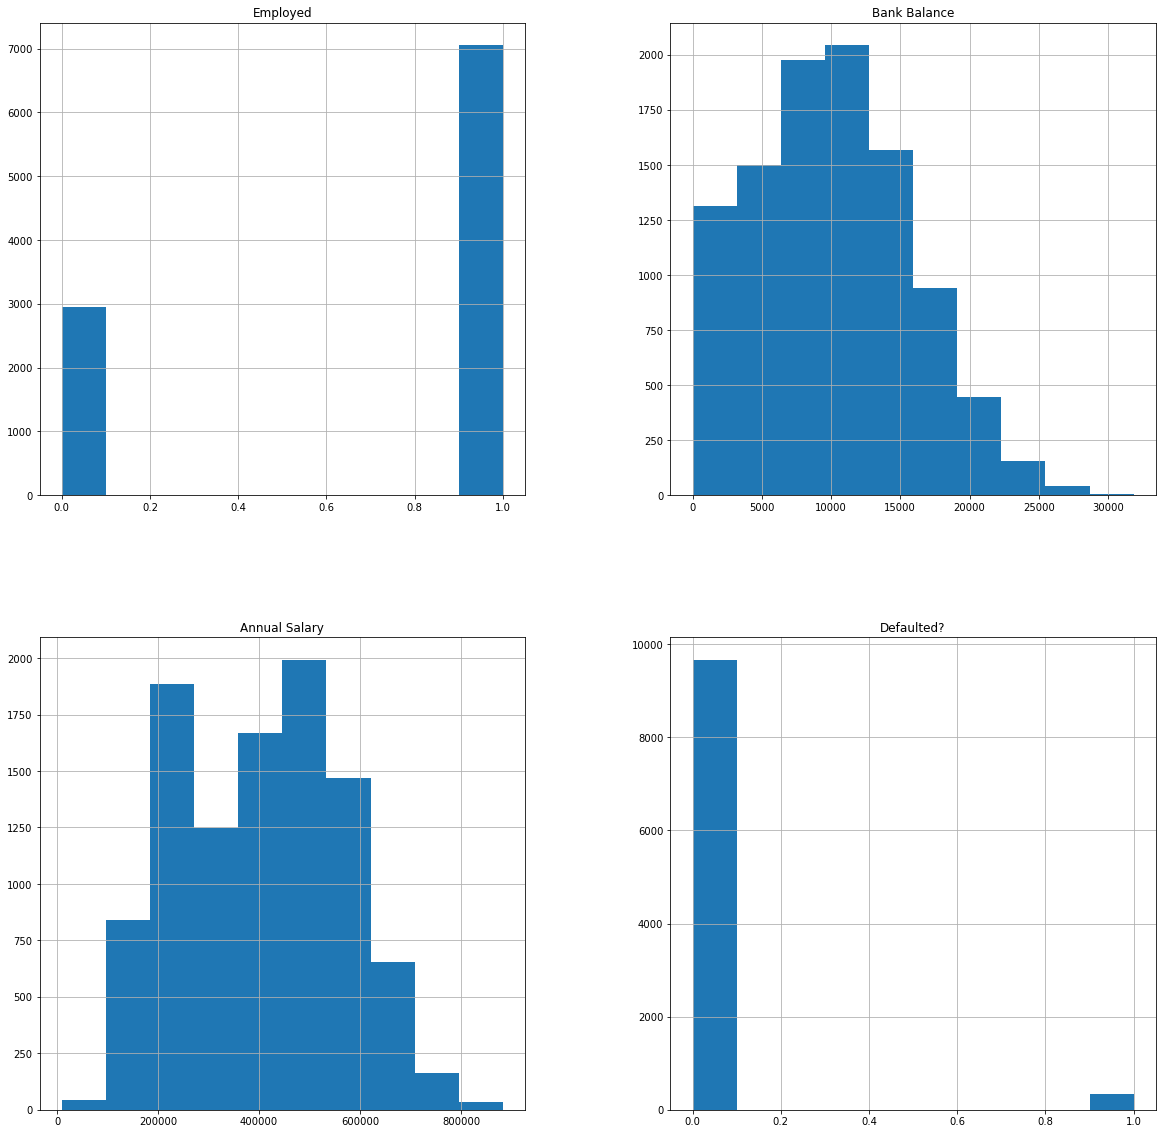

In [7]:
df.hist(figsize=(20,20))

In [8]:
import seaborn as sns

In [9]:
df.corr()

,Employed,Bank Balance,Annual Salary,Defaulted?
Employed,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.035420,0.350119,-0.019871,1.000000


<AxesSubplot:>

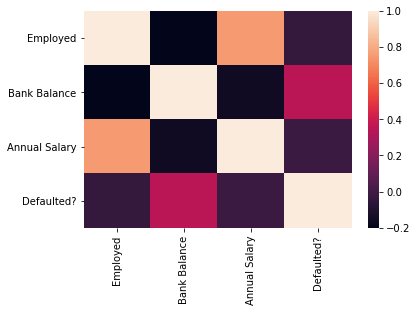

In [10]:
sns.heatmap(df.corr())

In [11]:
import matplotlib.pyplot as plt

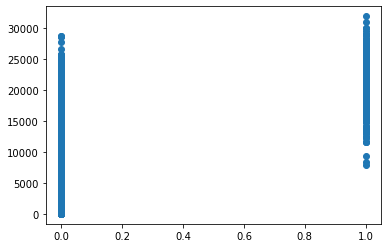

In [12]:
plt.scatter(df["Defaulted?"], df["Bank Balance"])

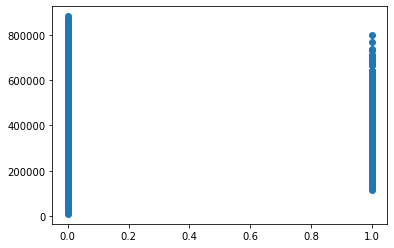

In [13]:
plt.scatter(df["Defaulted?"], df["Annual Salary"])

### Creating dummy variables on categorical input

In [14]:
df_dc = pd.get_dummies(df, columns=['Employed'])

### Split into train test

In [15]:
X = df_dc.drop(columns=["Defaulted?"])
Y = df_dc["Defaulted?"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

### Oversample the minority

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
Y_train.value_counts()

0    7246
1     254
Name: Defaulted?, dtype: int64

In [20]:
X_train,Y_train = SMOTE(random_state=1).fit_resample(X_train,Y_train)

In [21]:
Y_train.value_counts()

1    7246
0    7246
Name: Defaulted?, dtype: int64

### Normalize floor_area_sqm using zscore

In [22]:
from scipy import stats

In [23]:
X_train["Annual Salary"] = stats.zscore(X_train["Annual Salary"])

In [24]:
X_test["Annual Salary"] = stats.zscore(X_test["Annual Salary"])

In [25]:
X_train["Bank Balance"] = stats.zscore(X_train["Bank Balance"])

In [26]:
X_test["Bank Balance"] = stats.zscore(X_test["Bank Balance"])

## Machine Learning

### Logistic Regression

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [28]:
model = linear_model.LogisticRegression(random_state=1)
model.fit(X_train,Y_train)

LogisticRegression(random_state=1)

In [29]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy for logistic regression:",(cm[0,0]+cm[1,1])/(sum(sum(cm))))

Accuracy for logistic regression: 0.6024


In [30]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


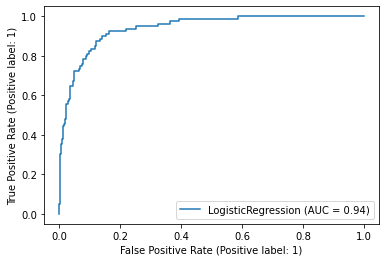

In [31]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


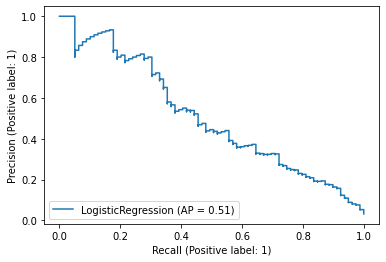

In [32]:
plot_precision_recall_curve(model,X_test,Y_test)

### Decision Tree

In [33]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [34]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy for decision tree:",(cm[0,0]+cm[1,1])/(sum(sum(cm))))

Accuracy for decision tree: 0.7148


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


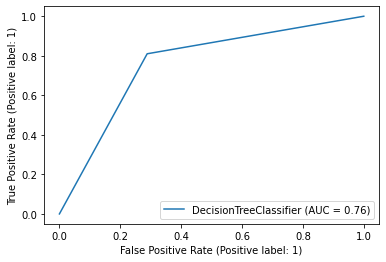

In [35]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


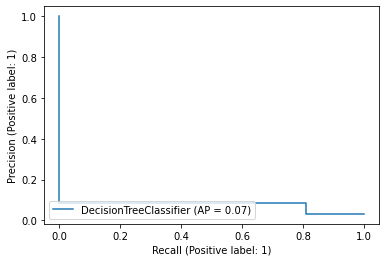

In [36]:
plot_precision_recall_curve(model,X_test,Y_test)

#### Use Grid

In [37]:
from sklearn.model_selection import GridSearchCV

model = tree.DecisionTreeClassifier()
grid = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(1, 20)]),cv=10)
grid = grid.fit(X_train, Y_train)
grid.best_params_
grid.best_score_

0.9274077723043241

### Random Forest

In [38]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier(random_state=1)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=1)

In [39]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy for random forest:",(cm[0,0]+cm[1,1])/(sum(sum(cm))))

Accuracy for random forest: 0.6692


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


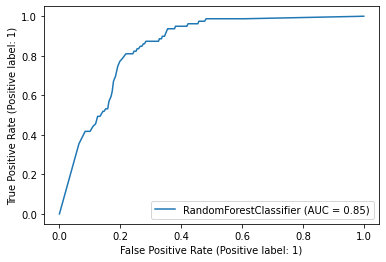

In [40]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


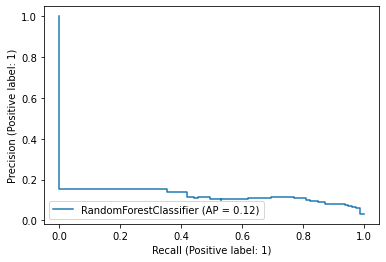

In [41]:
plot_precision_recall_curve(model,X_test,Y_test)

### Gradient Boosting

In [42]:
model = ensemble.GradientBoostingClassifier(random_state=1)
model.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=1)

In [43]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy for gradient boosting:",(cm[0,0]+cm[1,1])/(sum(sum(cm))))

Accuracy for gradient boosting: 0.606


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


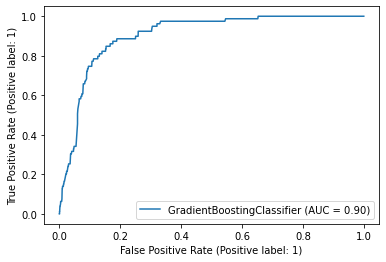

In [44]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


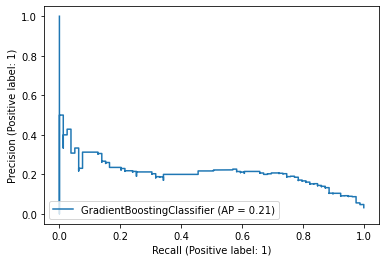

In [45]:
plot_precision_recall_curve(model,X_test,Y_test)

### Neural Network

In [46]:
from sklearn import neural_network
model = neural_network.MLPClassifier(random_state=1)
model.fit(X_train,Y_train)

MLPClassifier(random_state=1)

In [47]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy for neural network:",(cm[0,0]+cm[1,1])/(sum(sum(cm))))

Accuracy for neural network: 0.5992


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


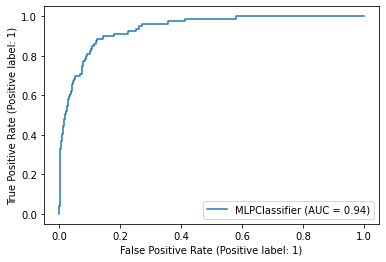

In [48]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


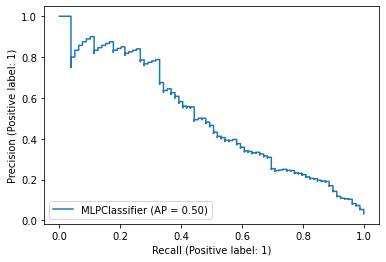

In [49]:
plot_precision_recall_curve(model,X_test,Y_test)

### Keras

In [50]:
import random
random.seed(1)

import numpy
numpy.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

from keras.models import Sequential
from keras.layers import Dense,Dropout

In [51]:
model = Sequential()

In [52]:
model.add(Dense(2,input_dim=4,activation='relu'))
model.add(Dropout(0.1))

In [53]:
model.add(Dense(1,activation="sigmoid"))

In [54]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [55]:
b = 5
h = model.fit(X_train,Y_train,batch_size=b,epochs=100)

Epoch 1/100
2899/2899 [==============================] - 4s 1ms/step - loss: 0.5558 - accuracy: 0.6369
Epoch 2/100
2899/2899 [==============================] - 4s 1ms/step - loss: 0.2862 - accuracy: 0.8581
Epoch 3/100
2899/2899 [==============================] - 4s 1ms/step - loss: 0.2810 - accuracy: 0.8603
Epoch 4/100
2899/2899 [==============================] - 3s 1ms/step - loss: 0.2833 - accuracy: 0.8590
Epoch 5/100
2899/2899 [==============================] - 3s 1ms/step - loss: 0.2792 - accuracy: 0.8599
Epoch 6/100
2899/2899 [==============================] - 3s 1ms/step - loss: 0.2725 - accuracy: 0.8663
Epoch 7/100
2899/2899 [==============================] - 3s 1ms/step - loss: 0.2774 - accuracy: 0.8623
Epoch 8/100
2899/2899 [==============================] - 3s 1ms/step - loss: 0.2724 - accuracy: 0.8647
Epoch 9/100
2899/2899 [==============================] - 3s 1ms/step - loss: 0.2737 - accuracy: 0.8636
Epoch 10/100
2899/2899 [==============================] - 4s 1ms/step - l

In [56]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy')

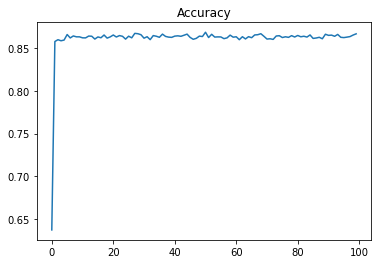

In [57]:
plt.plot(h.history["accuracy"])
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

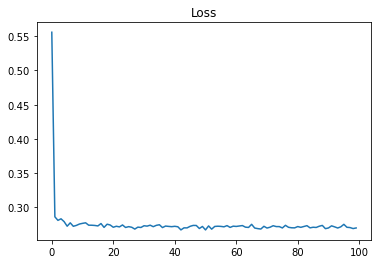

In [58]:
plt.plot(h.history["loss"])
plt.title("Loss")

In [59]:
#cannot run pred = model.predict_classes(X_test) which gives 1/0 right away, so we use this method instead
pred = model.predict(X_test)
pred = pred > 0.5
pred = pred.astype("int32")
cm = confusion_matrix(Y_test,pred)
print("Accuracy is", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

79/79 [==============================] - 0s 857us/step
Accuracy is 0.5792


<AxesSubplot:>

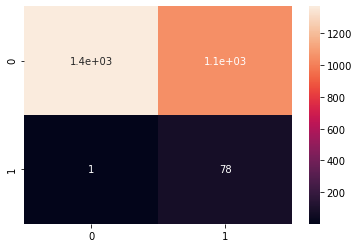

In [60]:
import seaborn as sns
sns.heatmap(cm, annot=True)

#### Using a different optimizer for Keras

In [61]:
model = Sequential()

In [62]:
model.add(Dense(2,input_dim=4,activation='relu'))
model.add(Dropout(0.1))

In [63]:
model.add(Dense(1,activation="sigmoid"))

In [64]:
model.compile(loss="binary_crossentropy",optimizer="RMSprop",metrics=["accuracy"])

In [65]:
b = 5
h = model.fit(X_train,Y_train,batch_size=b,epochs=100)

Epoch 1/100
2899/2899 [==============================] - 4s 1ms/step - loss: 0.3845 - accuracy: 0.8326
Epoch 2/100
2899/2899 [==============================] - 4s 1ms/step - loss: 0.2937 - accuracy: 0.8590
Epoch 3/100
2899/2899 [==============================] - 4s 1ms/step - loss: 0.2850 - accuracy: 0.8591
Epoch 4/100
2899/2899 [==============================] - 3s 1ms/step - loss: 0.2836 - accuracy: 0.8638
Epoch 5/100
2899/2899 [==============================] - 4s 1ms/step - loss: 0.2826 - accuracy: 0.8632
Epoch 6/100
2899/2899 [==============================] - 4s 1ms/step - loss: 0.2814 - accuracy: 0.8655
Epoch 7/100
2899/2899 [==============================] - 4s 1ms/step - loss: 0.2802 - accuracy: 0.8633
Epoch 8/100
2899/2899 [==============================] - 3s 1ms/step - loss: 0.2821 - accuracy: 0.8608
Epoch 9/100
2899/2899 [==============================] - 4s 1ms/step - loss: 0.2823 - accuracy: 0.8631
Epoch 10/100
2899/2899 [==============================] - 4s 1ms/step - l

In [66]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy')

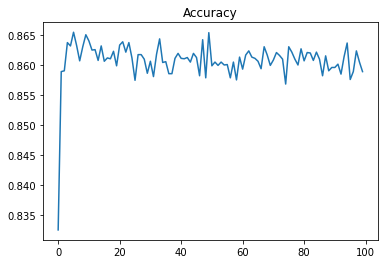

In [67]:
plt.plot(h.history["accuracy"])
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

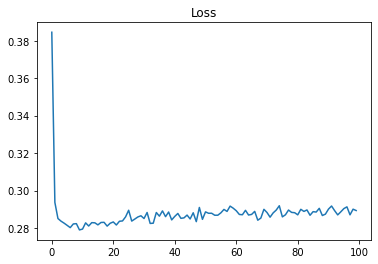

In [68]:
plt.plot(h.history["loss"])
plt.title("Loss")

In [69]:
#cannot run pred = model.predict_classes(X_test) which gives 1/0 right away, so we use this method instead
pred = model.predict(X_test)
pred = pred > 0.5
pred = pred.astype("int32")
cm = confusion_matrix(Y_test,pred)
print("Accuracy is", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

79/79 [==============================] - 0s 930us/step
Accuracy is 0.542


<AxesSubplot:>

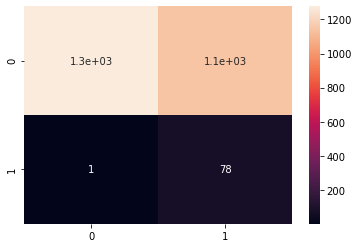

In [70]:
import seaborn as sns
sns.heatmap(cm, annot=True)

#### RMSE decreased slightly suggesting that RMSprop is a better optimizer

## Improving accuracy

### Feature selection
There is actually no need to do this as there are only 3 X variables

In [71]:
from sklearn.feature_selection import f_classif, SelectKBest

In [72]:
X = df_dc.drop(columns=["Defaulted?"])
Y = df_dc["Defaulted?"]

In [73]:
f = SelectKBest(score_func=f_classif,k=2).fit(X,Y)

In [74]:
f = f.get_support()

In [75]:
f

array([ True, False, False,  True])

In [76]:
X.columns[f]

Index(['Bank Balance', 'Employed_1'], dtype='object')

#### Using only Bank Balance and Employed

In [77]:
df_drop = df[["Defaulted?", "Bank Balance", "Employed"]]

In [78]:
df_dc = pd.get_dummies(df_drop, columns=['Employed'])

### Split into train test

In [79]:
X = df_dc.drop(columns=["Defaulted?"])
Y = df_dc["Defaulted?"]

In [80]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [81]:
Y_train.value_counts()

0    7246
1     254
Name: Defaulted?, dtype: int64

In [82]:
X_train,Y_train = SMOTE(random_state=1).fit_resample(X_train,Y_train)

In [83]:
Y_train.value_counts()

1    7246
0    7246
Name: Defaulted?, dtype: int64

In [84]:
X_train["Bank Balance"] = stats.zscore(X_train["Bank Balance"])

In [85]:
X_test["Bank Balance"] = stats.zscore(X_test["Bank Balance"])

## Machine Learning with feature selection

### Logistic Regression

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [87]:
model = linear_model.LogisticRegression(random_state=1)
model.fit(X_train,Y_train)

LogisticRegression(random_state=1)

In [88]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("Accuracy for logistic regression:",(cm[0,0]+cm[1,1])/(sum(sum(cm))))

Accuracy for logistic regression: 0.6204


In [89]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


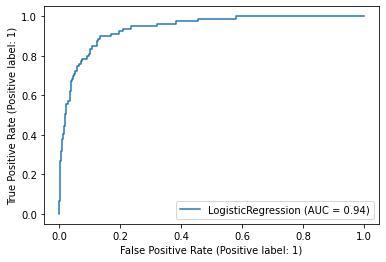

In [90]:
plot_roc_curve(model,X_test,Y_test)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


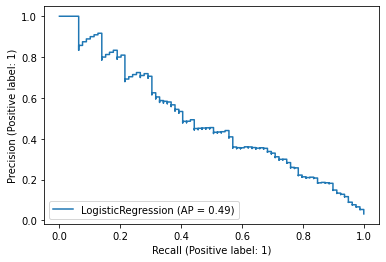

In [91]:
plot_precision_recall_curve(model,X_test,Y_test)

#### Not much changed as expected since we only dropped one variable, the accuracy increased slightly.

## Pros and Cons for each model

### Logistic Regression

#### Pros
Logistic regression is easier to implement, interpret, and very efficient to train.	
It makes no assumptions about distributions of classes in feature space.
It can easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions.	
It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative).	
It is very fast at classifying unknown records.	
Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.	
It can interpret model coefficients as indicators of feature importance.	

#### Cons
If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting. 	
The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. Non-linear problems can’t be solved with logistic regression because it has a linear decision surface. 	
Logistic Regression requires average or no multicollinearity between independent variables. 	
It can only be used to predict discrete functions. Hence, the dependent variable of Logistic Regression is bound to the discrete number set. 	
It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.	
Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets. 	
Logistic Regression needs that independent variables are linearly related to the log odds (log(p/(1-p)).

#### How to overcome the weaknesses
Consider Regularization (L1 and L2) techniques to avoid over-fitting in high dimensional datasets for logistic regression. Normalisation is important to avoid domination of one feature. Optimize on other metrics also such as Log Loss and F1-Score. The F1-Score could be useful, in case of class imbalance. Since we oversampled the minority, there is no need to worry about this. Improve the accuracy by performing a Grid Search to tune the hyperparameters of the model.

### Decision Tree

#### Pros
To build a model which is easy to explain to people, a decision tree model will always do better than a logistic model.
Decision trees generate understandable rules, they are capable of handline both continuous and categorical variables and provide a clear indication of which fields are nost important for prediction or classification.

#### Cons
The process of growing a decision tree is computationally expensive. At each node, each candidate splitting field must be sorted before its split can be found. And there is a problem with overfitting.

#### How to overcome the weaknesses
Prune the tree so that there is no overfitting. Use random forest or gradient boosting for better accuracy.

### Random Forest

#### Pros
Robust to outliers.
Works well with non-linear data.
Lower risk of overfitting.
Runs efficiently on a large dataset.
Better accuracy than other classification algorithms. Bootstrap Aggregation (Bagging) is a general procedure that can be used to reduce the variance for those algorithm that have high variance.

#### Cons
Random forests are found to be biased while dealing with categorical variables. It is slow in training a model. It is not suitable for linear methods with a lot of sparse features.

#### How to overcome the weaknesses
Use less variables (those that are not important) to make training faster

### Gradient Boosting

Gradient boosting trees can be more accurate than random forests. Because we train them to correct each other’s errors, they’re capable of capturing complex patterns in the data. However, if the data are noisy, the boosted trees may overfit and start modeling the noise.

#### Pros
Lots of flexibility - can optimize on different loss functions and provides several hyper parameter tuning options that make the function fit very flexible.
No data pre-processing required - often works great with categorical and numerical values as is.
Handles missing data - imputation not required.

#### Cons
Gradient Boosting Models will continue improving to minimize all errors. This can overemphasize outliers and cause overfitting.
Computationally expensive - often require many trees (>1000) which can be time and memory exhaustive.
The high flexibility results in many parameters that interact and influence heavily the behavior of the approach (number of iterations, tree depth, regularization parameters, etc.). This requires a large grid search during tuning.
Less interpretative in nature, although this is easily addressed with various tools.

#### How to overcome the weaknesses
Use less variables (those that are not important) to make training faster

### Neural Network

#### Pros
Neural Network uses entropy instead of gini coefficient to compute errors, which mimics human nature. It results in very low predictive error (on trainset!). It can capture complex relationships by increasing number of hidden nodes and/or hidden layers. There is no need to specify a relationship between Y and Xs for neural networks. Neural networks are good to model with nonlinear data with large number of inputs; for example, images. It is reliable in an approach of tasks involving many features. It works by splitting the problem of classification into a layered network of simpler elements.
Once trained, the predictions are pretty fast.
Neural networks can be trained with any number of inputs and layers.

#### Cons
Neural networks are black boxes, meaning we cannot know how much each independent variable is influencing the dependent variables.
It is computationally very expensive and time consuming to train with traditional CPUs.
Neural networks depend a lot on training data. This leads to the problem of over-fitting and generalization. The mode relies more on the training data and may be tuned to the data.

#### How to overcome the weaknesses
Deep neural networks are prone to overfitting because they learn millions or billions of parameters while building the model. A model having this many parameters can overfit the training data because it has sufficient capacity to do so.

The basic idea to deal with the problem of overfitting is to decrease the complexity of the model. To do so, we can make the network smaller by simply removing the layers or reducing the number of neurons, etc.

### Importance of model to bank

Decision Tree performed the best with the highest accuracy at 0.7148 even after various improvements made to the other models. The bank can plot out the tree to see which variables are more important, so they can put in more care into researching these variables when deciding if the loan will default. In this case, false negative is more important than false postives when deciding if the loan will default as the bank will suffer more when they give a loan to someone that will default the loan. Thus, when evaluating the model, the bank can look at the false negative rate.